In [1]:
from functools import partial
from pathlib import Path

from skfem import *
from skfem.models.poisson import laplace, mass, unit_load
from skfem.io.json import from_file

import numpy as np

## Define Mesh

Can be done on same mesh as problem you are solving

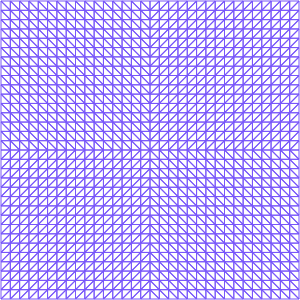

In [ ]:
L = 5.0
mesh = MeshTri.init_sqsymmetric().refined(4)
mesh = mesh.scaled(2 * L).translated((-L, -L))
element = ElementTriP1()
basis = Basis(mesh,element)
source = np.array([1, 1])
mesh

## Simply analytics to compare to

In [ ]:
def greens(a: float, s: np.ndarray, x: np.ndarray) -> np.ndarray:
    """Return the Green's function for a disk of radius `a`

    with source at point `s`, evaluated at points `x`.
    """

    snorm = np.linalg.norm(s)
    sfull = s[:, None, None]
    numerator = np.linalg.norm(snorm ** 2 * x - a ** 2 * sfull, axis=0)
    denominator = a * snorm * np.linalg.norm(x - sfull, axis=0)
    return np.log(numerator / denominator) / 2 / np.pi

: 

L2 error: 0.41650231190679354


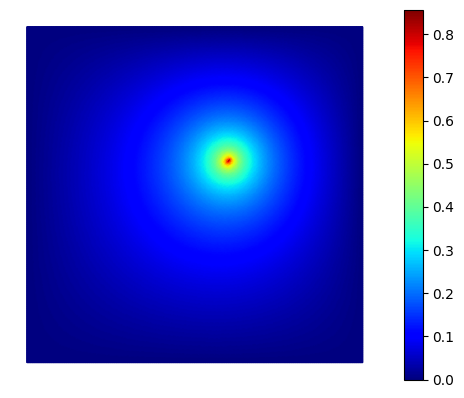

: 

In [ ]:
A = asm(laplace, basis)
b = basis.point_source(source)

x = solve(*condense(A, b, D=basis.get_dofs()))

a = np.linalg.norm(basis.mesh.p, axis=0).max()
exact = basis.project(lambda x: greens(a, source, x))
error = x - exact
l2error = np.sqrt(error @ mass.assemble(basis) @ error)

def visualize():
    from skfem.visuals.matplotlib import plot
    return plot(basis,
                x,
                shading='gouraud',
                nrefs=2,
                colorbar=True)

if __name__ == "__main__":
    print("L2 error:", l2error)
    visualize().show()